In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os,json

# Number of maximun parallel jobs defined by the number of CPUs
import multiprocessing
n_cpu = multiprocessing.cpu_count()

# Standard Scaler
from sklearn.preprocessing import StandardScaler

# Kmeans unsupervised learning tool
from sklearn.cluster import KMeans

# Split train/test
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Label Encode
from sklearn.preprocessing import label_binarize

# Feature Scaling (normalize)
from sklearn.preprocessing import RobustScaler

# SVM
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Cross Validation
from sklearn.model_selection import KFold, cross_val_score

# Confusion Matrix
from sklearn.metrics import confusion_matrix

# ROC Curve
from sklearn.metrics import roc_curve, auc

# Classification Report
from sklearn.metrics import classification_report

# Visualization options
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
def first_step():
    print()
    print('02 - Step 0: Checking intensity JSON file')
    print()
    print('\tChecking if intensity_info.json file already exists')
    if not os.path.exists('intensity_info.json'):
        print('\t\t---FALSE---')
        print('\tCreating JSON file')
        print()
        act_lab = {
            1:{'name':'lying','intensity3':1,'intensity5':1},
            2:{'name':'sitting','intensity3':1,'intensity5':1},
            3:{'name':'standing','intensity3':1,'intensity5':2},
            4:{'name':'walking','intensity3':2,'intensity5':2},
            5:{'name':'running','intensity3':3,'intensity5':5},
            6:{'name':'cycling','intensity3':3,'intensity5':4},
            7:{'name':'Nordic walking','intensity3':3,'intensity5':3},
            9:{'name':'watching TV','intensity3':1,'intensity5':1},
            10:{'name':'computer work','intensity3':1,'intensity5':2},
            11:{'name':'car driving','intensity3':2,'intensity5':2},
            12:{'name':'ascending stairs','intensity3':2,'intensity5':4},
            13:{'name':'descending stairs','intensity3':2,'intensity5':3},
            16:{'name':'vacuum cleaning','intensity3':2,'intensity5':3},
            17:{'name':'ironing','intensity3':1,'intensity5':2},
            18:{'name':'folding laundry','intensity3':1,'intensity5':2},
            19:{'name':'house cleaning','intensity3':2,'intensity5':3},
            20:{'name':'playing soccer','intensity3':3,'intensity5':4},
            24:{'name':'rope jumping','intensity3':3,'intensity5':5}
        }
        with open('intensity_info.json', 'w') as fp:
            json.dump(act_lab, fp)
        fp.close()
        print('\tIntensity info JSON file has been created')
        print('\tReturning to user the intensity data')
        return act_lab
    else:
        print('\t\t---TRUE---')
        print('\tLoading JSON file')
        print()
        with open('intensity_info.json', 'r') as fp:
            act_lab = json.load(fp)
        print('\tIntensity info JSON file has been loaded')
        print('\tReturning to user the intensity data')
        return act_lab  

In [3]:
def reading_data_from_pkl(file,act_lab):
    print()
    print('02 - Step 1')
    print()
    print('\tReading file: ',file)
    df = pd.read_pickle(file)
    if sum([type(item)==str for item in act_lab.keys()])!=0:
        df['Intensity3'] = list(map(lambda x: act_lab[str(x)]['intensity3'],df['Activity ID']))
        df['Intensity5'] = list(map(lambda x: act_lab[str(x)]['intensity5'],df['Activity ID']))
    else:
        df['Intensity3'] = list(map(lambda x: act_lab[x]['intensity3'],df['Activity ID']))
        df['Intensity5'] = list(map(lambda x: act_lab[x]['intensity5'],df['Activity ID']))
    print('\t\t>>DONE<<')
    print('')
    return df

In [4]:
def standard_scaler_pipe(data):
    print()
    print('02 - Step 2')
    print()
    print('\tScaling Data (Standard Scaler)')
    scaler = StandardScaler()
    scaler.fit(data);
    print('\t\t>>DONE<<')
    print('')
    return scaler.transform(data)

In [5]:
act_lab = first_step()
df = reading_data_from_pkl('physical_activity.pkl',act_lab)
x = standard_scaler_pipe(df[[item for item in df.columns if item!='Activity ID' and item!='Intensity3' and item!='Intensity5']])


02 - Step 0: Checking intensity JSON file

	Checking if intensity_info.json file already exists
		---TRUE---
	Loading JSON file

	Intensity info JSON file has been loaded
	Returning to user the intensity data

02 - Step 1

	Reading file:  physical_activity.pkl
		>>DONE<<


02 - Step 2

	Scaling Data (Standard Scaler)
		>>DONE<<



## KMEANS


Num of clusters:  2



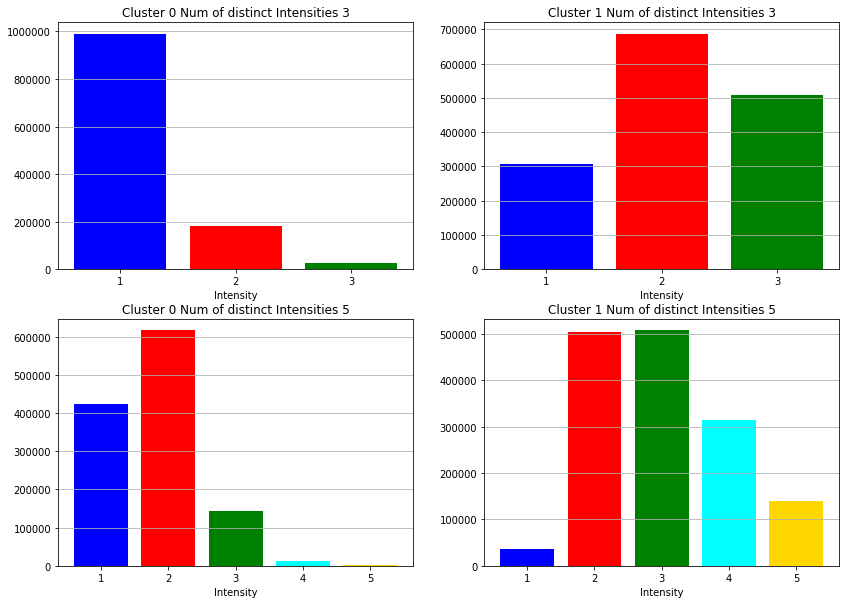


------------------------------------------

Num of clusters:  3



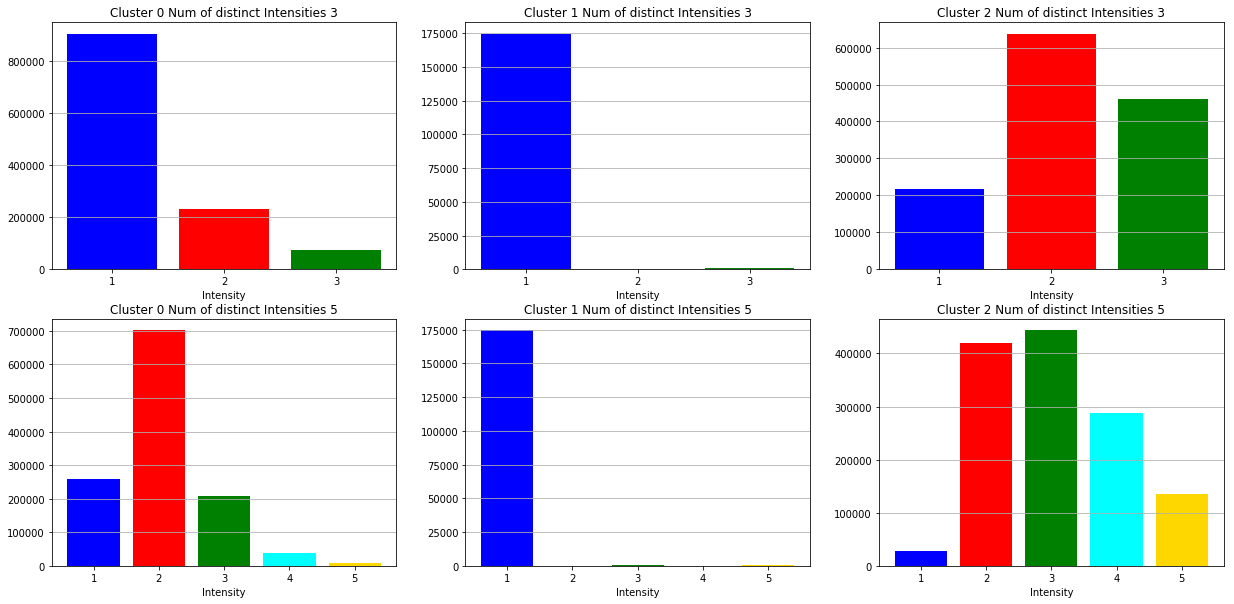


------------------------------------------

Num of clusters:  4



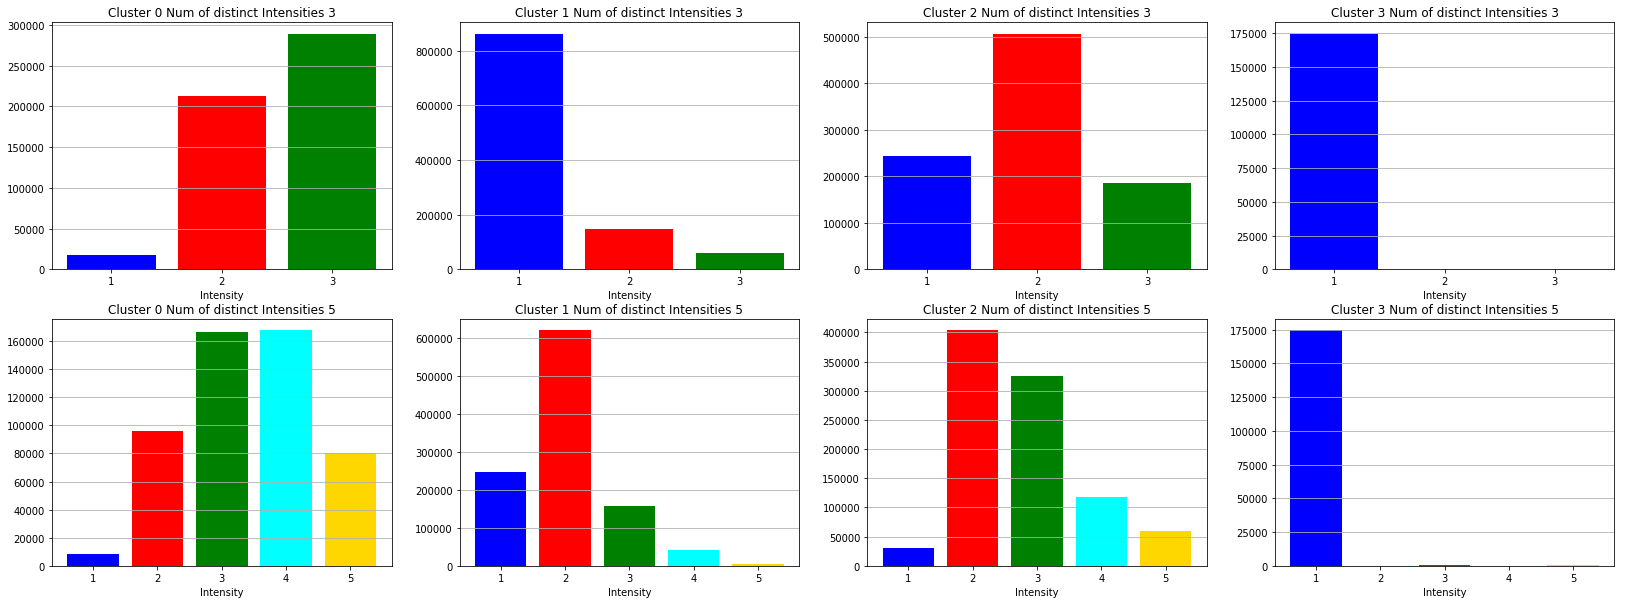


------------------------------------------

Num of clusters:  5



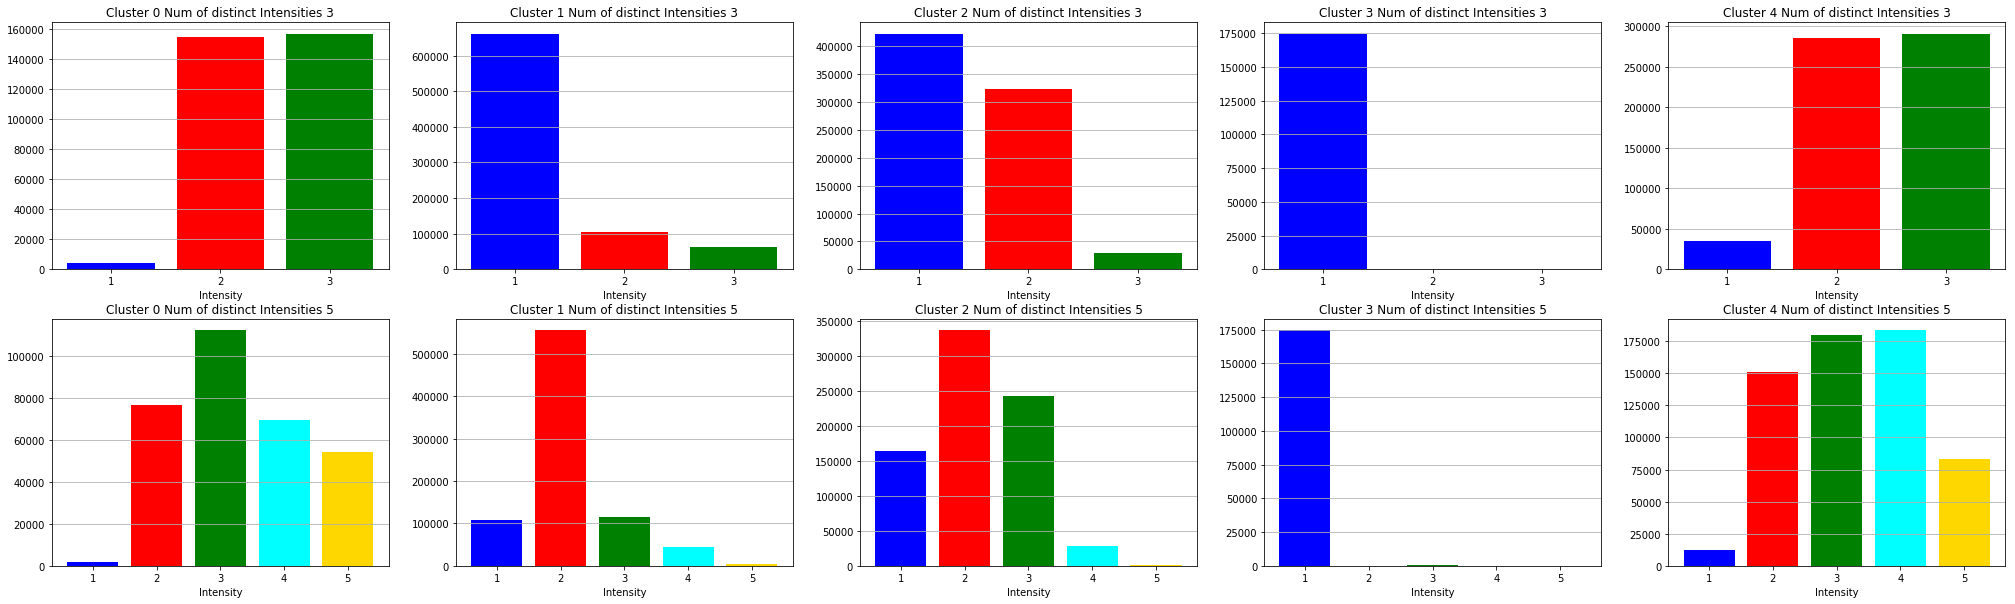


------------------------------------------
CPU times: user 7min 35s, sys: 2min 36s, total: 10min 11s
Wall time: 7min 34s


In [11]:
%%time
colors = ['blue','red','green','cyan','gold']
list_clus = [2,3,4,5]
for item in list_clus:
    print()
    print('Num of clusters: ',item)
    print()
    Kmodel = KMeans(n_clusters=item)
    Kmodel.fit(x)
    labs = np.unique(Kmodel.labels_)
    df_final = pd.DataFrame()
    df_final['Klabels'] = Kmodel.labels_
    if sum([type(item)==str for item in act_lab.keys()])!=0:
        df_final['Intensity3'] = list(map(lambda x: act_lab[str(x)]['intensity3'],df['Activity ID']))
        df_final['Intensity5'] = list(map(lambda x: act_lab[str(x)]['intensity5'],df['Activity ID']))
    else:
        df_final['Intensity3'] = list(map(lambda x: act_lab[x]['intensity3'],df['Activity ID']))
        df_final['Intensity5'] = list(map(lambda x: act_lab[x]['intensity5'],df['Activity ID']))
    fig = plt.figure(figsize=(7*len(labs),10))
    counter = 0
    for e in labs:
        counter += 1
        ax = plt.subplot(2,len(labs),counter)
        n,c = np.unique(df_final[df_final['Klabels']==e]['Intensity3'],return_counts=True)
        k = ax.bar(n,c)
        counter1 = -1
        for el in k:
            counter1 += 1
            if counter1>len(colors)-1:
                counter1 = 0
            el.set_facecolor(colors[counter1])
        ax.set_xticks(n)
        ax.yaxis.grid()
        ax.set_title('Cluster '+str(e)+' Num of distinct Intensities '+str(len(n)))
        ax.set_xlabel('Intensity')
    for e in labs:
        counter += 1
        ax = plt.subplot(2,len(labs),counter)
        n,c = np.unique(df_final[df_final['Klabels']==e]['Intensity5'],return_counts=True)
        k = ax.bar(n,c)
        counter1 = -1
        for el in k:
            counter1 += 1
            if counter1>len(colors)-1:
                counter1 = 0
            el.set_facecolor(colors[counter1])
        ax.set_xticks(n)
        ax.yaxis.grid()
        ax.set_title('Cluster '+str(e)+' Num of distinct Intensities '+str(len(n)))
        ax.set_xlabel('Intensity')
    plt.savefig('Figures/02-Kmeans_'+str(item)+'_clusters.png',dpi=100)
    plt.show()
    del Kmodel
    del df_final
    print()
    print('------------------------------------------')

___

## RANDOM FOREST

In [6]:
def rand_forest(df):
    print()
    print('02 - Step 3:')
    print()
    print('\tSpliting and using Standard Scaler')
    X = df[[item for item in df.columns if item!='Activity ID' and item!='Intensity3' and item!='Intensity5']].values
    if 'Intensity3' in df.columns:
        Y = df['Intensity3'].values
    elif 'Intensity5' in df.columns:
        Y = df['Intensity5'].values
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size = 0.25, random_state = 21)
    print('\t\t>>DONE<<')
    print()
    return X_train1, X_test1, y_train1, y_test1
    
def cats(num_of_cat,df):
    if num_of_cat == '3':
        X_train1, X_test1, y_train1, y_test1 = rand_forest(df[[item for item in df.columns if item!='Intensity5']])
    elif num_of_cat == '5':
        X_train1, X_test1, y_train1, y_test1 = rand_forest(df[[item for item in df.columns if item!='Intensity3']])
    return X_train1, X_test1, y_train1, y_test1

def print_confusion_matrix(confusion_matrix, accuracy, class_names, model, figsize = (10,8), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap=plt.cm.pink_r)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    all_sample_title = model+' | Accuracy: '+str(accuracy)
    plt.title(all_sample_title, size = 15)
    plt.savefig('Figures/Random_forest_'+str(len(class_names))+'_categories.png',dpi=150)
    plt.close('all')
    
def rand_forest_classifier(num_of_cat,df):
    X_train1, X_test1, y_train1, y_test1 = cats(num_of_cat,df)
    print()
    print('02 - Step 4: Applying Random Forest Classifier')
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42, n_jobs=n_cpu)
    print()
    print('\tTrainning')
    classifier.fit(X_train1, y_train1)
    print('\t\t>>DONE<<')
    print()
    print('\tPredicting')
    y_pred1 = classifier.predict(X_test1)
    accuracy_random = metrics.accuracy_score(y_test1, y_pred1)
    cm_random = metrics.confusion_matrix(y_test1, y_pred1)
    print('\t\t>>DONE<<')
    print()
    print('\tPrinting confusion matrix')
    if num_of_cat=='3':
        print_confusion_matrix(cm_random,accuracy_random,df['Intensity3'].unique(),model='Random Forest')
    elif num_of_cat=='5':
        print_confusion_matrix(cm_random,accuracy_random,df['Intensity5'].unique(),model='Random Forest')
    print('\t\t>>DONE<<')
    print()
    return classifier,accuracy_random

In [12]:
%%time
for item in ['3','5']:
    print()
    print('Num of categories of Intensity: '+item)
    model,accuracy = rand_forest_classifier(item,df)
    print('\t>> Accuracy: ',accuracy)
    print()
    print(model)
    print()


Num of categories of Intensity: 3

02 - Step 3:

	Spliting and using Standard Scaler
		>>DONE<<


02 - Step 4: Applying Random Forest Classifier

	Trainning
		>>DONE<<

	Predicting
		>>DONE<<

	Printing confusion matrix
		>>DONE<<

	>> Accuracy:  0.9997719373331181

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=8,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


Num of categories of Intensity: 5

02 - Step 3:

	Spliting and using Standard Scaler
		>>DONE<<


02 - Step 4: Applying Random Forest Classifier

	Trainning
		>>DONE<<

	Predicting
		>>DONE<<

	Printing confusion matrix
		>>DONE<<

	>> Accuracy:  0.9997334332465017

RandomForestClassifier(bootstrap=True, class_weight=N